In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataset
train = pd.read_csv("C:\\Users\\gehlo\\Downloads\\hacktrain.csv")
test = pd.read_csv("C:\\Users\\gehlo\\Downloads\\hacktest.csv")

In [4]:
train.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [6]:
train.isna().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [7]:
train.isnull().sum().sum()

np.int64(25040)

In [8]:
train['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

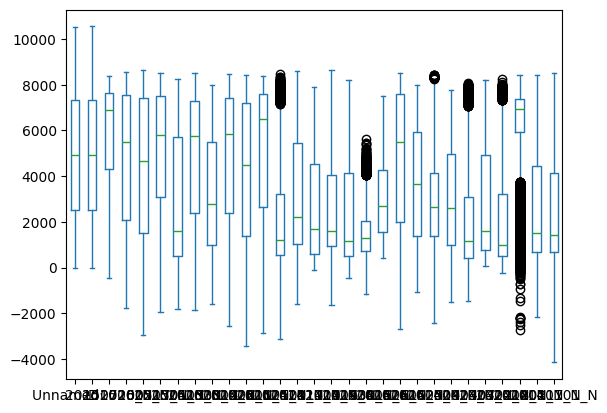

In [9]:
train.plot.box();

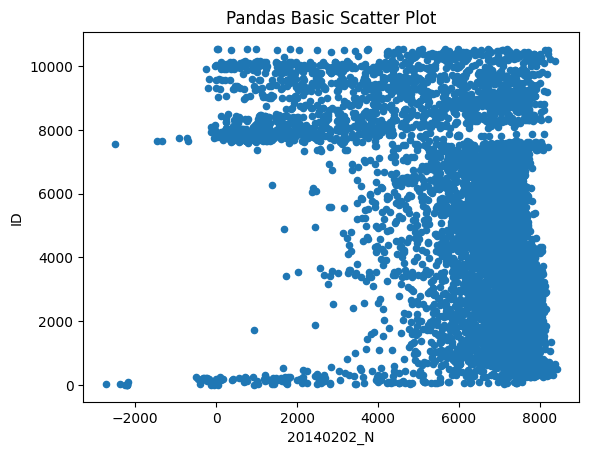

In [14]:
train.plot(kind='scatter', y='ID', x='20140202_N', title='Pandas Basic Scatter Plot')
plt.show()

<Axes: >

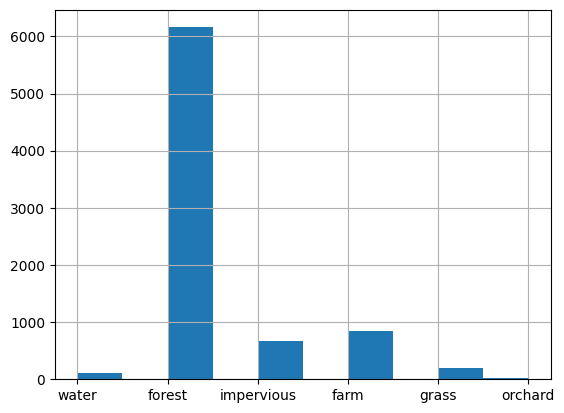

In [12]:
train['class'].hist()

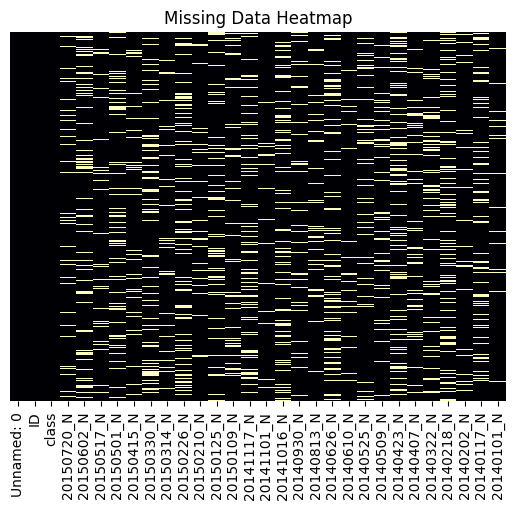

In [15]:
import seaborn as sns

sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='magma')
plt.title("Missing Data Heatmap")
plt.show()

In [16]:
def drop_ndvi_outliers(train, ndvi_columns):
    # Create a mask of rows to drop (default: all False)
    rows_to_drop = [False] * len(train)

    for col in ndvi_columns:
        col_values = train[col]
        Q1 = np.percentile(col_values, 25)
        Q3 = np.percentile(col_values, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Mark rows where outliers exist
        for i in range(len(train)):
            if col_values[i] < lower or col_values[i] > upper:
                rows_to_drop[i] = True

    # Drop rows where outliers were found
    train = train[~pd.Series(rows_to_drop)].reset_index(drop=True)
    return train

In [17]:
ndvi_cols = [
 '20150720_N',
 '20150602_N',
 '20150517_N',
 '20150501_N',
 '20150415_N',
 '20150330_N',
 '20150314_N',
 '20150226_N',
 '20150210_N',
 '20150125_N',
 '20150109_N',
 '20141117_N',
 '20141101_N',
 '20141016_N',
 '20140930_N',
 '20140813_N',
 '20140626_N',
 '20140610_N',
 '20140525_N',
 '20140509_N',
 '20140423_N',
 '20140407_N',
 '20140322_N',
 '20140218_N',
 '20140202_N',
 '20140117_N',
 '20140101_N']
train = drop_ndvi_outliers(train,ndvi_cols )
print(train)

      Unnamed: 0     ID       class  20150720_N  20150602_N  20150517_N  \
0              0      1       water    637.5950     658.668   -1882.030   
1              1      2       water    634.2400     593.705   -1625.790   
2              3      4       water     58.0174   -1599.160         NaN   
3              4      5       water     72.5180         NaN     380.436   
4              7      8       water   1136.4400         NaN         NaN   
...          ...    ...         ...         ...         ...         ...   
7995       10537  10538  impervious   1207.7000     984.620         NaN   
7996       10538  10539  impervious   2170.3500    1419.720    1361.000   
7997       10541  10542  impervious   1895.6800    1454.740         NaN   
7998       10542  10543  impervious   3465.7400    1283.320     413.412   
7999       10544  10545  impervious   6941.1900    1667.870    5084.780   

      20150501_N  20150415_N  20150330_N  20150314_N  ...  20140610_N  \
0       -1924.36     997.9

In [18]:
train.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [19]:
from sklearn.impute import KNNImputer

def knn_classwise_impute(df, ndvi_columns, class_col, k):
    result = []

    for cls, group in df.groupby(class_col):
        temp = group.copy()
        imputer = KNNImputer(n_neighbors=k)
        temp[ndvi_columns] = imputer.fit_transform(temp[ndvi_columns])
        result.append(temp)

    return pd.concat(result).sort_index()

In [20]:
train = knn_classwise_impute(train, ndvi_cols, class_col='class', k=5)

In [21]:
train.isna().sum().sum()

np.int64(0)

In [22]:
train_X = train.drop('class', axis=1)
train_y = train['class']

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(train_y)

In [24]:
train.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.6680,-1882.0300,-1924.36,997.904,-1739.990000,630.0870,...,-1134.48660,-1043.160,-1942.4900,267.138,-0.4226,399.6648,211.328,-2203.020,-1180.1900,433.906
1,1,2,water,634.2400,593.7050,-1625.7900,-1672.32,914.198,-692.386000,707.6260,...,-944.06348,-933.934,-625.3850,120.059,364.8580,476.9720,220.878,-2250.000,-1360.5600,524.075
2,3,4,water,58.0174,-1599.1600,-927.8894,-1052.63,114.246,-1564.630000,75.0998,...,-1025.88000,368.622,-589.9304,-1227.800,304.6210,412.0062,369.214,-2202.120,112.6054,-1343.550
3,4,5,water,72.5180,-531.0318,380.4360,-1256.93,515.805,-1413.180000,-802.9420,...,-1813.95000,155.624,-749.6738,-924.073,432.1500,282.8330,298.320,-2197.360,112.6054,-826.727
4,7,8,water,1136.4400,1336.0898,-267.8290,1647.83,1935.800,684.050792,2158.9800,...,1535.00000,1959.430,-279.3170,-384.915,-113.4060,1020.7200,1660.650,-116.801,-568.0500,-1357.140


In [25]:
train_X.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,637.5950,658.6680,-1882.0300,-1924.36,997.904,-1739.990000,630.0870,-51.0018,...,-1134.48660,-1043.160,-1942.4900,267.138,-0.4226,399.6648,211.328,-2203.020,-1180.1900,433.906
1,1,2,634.2400,593.7050,-1625.7900,-1672.32,914.198,-692.386000,707.6260,-1670.5900,...,-944.06348,-933.934,-625.3850,120.059,364.8580,476.9720,220.878,-2250.000,-1360.5600,524.075
2,3,4,58.0174,-1599.1600,-927.8894,-1052.63,114.246,-1564.630000,75.0998,729.7900,...,-1025.88000,368.622,-589.9304,-1227.800,304.6210,412.0062,369.214,-2202.120,112.6054,-1343.550
3,4,5,72.5180,-531.0318,380.4360,-1256.93,515.805,-1413.180000,-802.9420,683.2540,...,-1813.95000,155.624,-749.6738,-924.073,432.1500,282.8330,298.320,-2197.360,112.6054,-826.727
4,7,8,1136.4400,1336.0898,-267.8290,1647.83,1935.800,684.050792,2158.9800,-577.5808,...,1535.00000,1959.430,-279.3170,-384.915,-113.4060,1020.7200,1660.650,-116.801,-568.0500,-1357.140


In [26]:
train_y.head()

0    water
1    water
2    water
3    water
4    water
Name: class, dtype: object

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(train_X, train_y)

In [28]:
reg.score(train_X,train_y)

0.95725

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test)


In [30]:
# # try one
# model = LogisticRegression(penalty='l1', solver='liblinear')  # Lasso, sparse & aggressive

# model.fit(train_X, train_y)

In [31]:
# # try two
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1.0)  # 'l2' is Ridge (default)
model.fit(X_train_scaled, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
model.score(X_train_scaled ,train_y)

0.973125

In [33]:
y_pred = model.predict(X_test_scaled)

In [34]:
submission_df = pd.DataFrame({
    'ID': test['ID'],
    'class': y_pred
})

In [35]:
submission_df.to_csv("C:\\Users\\gehlo\\Downloads\\submission13.csv", index=False)
print("✅ submission.csv ready, boss 😎")

✅ submission.csv ready, boss 😎
